In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os 
import matplotlib.image as mpimg
import random
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from sklearn.model_selection import  train_test_split 
from tensorflow.keras.utils import load_img, img_to_array
import pathlib

In [2]:
all_training_files = list(os.walk("./train/train"))

In [4]:
print(all_training_files[0]) #[tuple(3),....] tuple(3) => path, list(dir), list(files)

('./train/train', ['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon'], [])


In [6]:
print(len(all_training_files[1]))
print(all_training_files[1])

3
('./train/train\\Apple Braeburn', [], ['Apple Braeburn_0.jpg', 'Apple Braeburn_1.jpg', 'Apple Braeburn_10.jpg', 'Apple Braeburn_100.jpg', 'Apple Braeburn_101.jpg', 'Apple Braeburn_102.jpg', 'Apple Braeburn_103.jpg', 'Apple Braeburn_104.jpg', 'Apple Braeburn_105.jpg', 'Apple Braeburn_106.jpg', 'Apple Braeburn_107.jpg', 'Apple Braeburn_108.jpg', 'Apple Braeburn_109.jpg', 'Apple Braeburn_11.jpg', 'Apple Braeburn_110.jpg', 'Apple Braeburn_111.jpg', 'Apple Braeburn_112.jpg', 'Apple Braeburn_113.jpg', 'Apple Braeburn_114.jpg', 'Apple Braeburn_115.jpg', 'Apple Braeburn_116.jpg', 'Apple Braeburn_117.jpg', 'Apple Braeburn_118.jpg', 'Apple Braeburn_119.jpg', 'Apple Braeburn_12.jpg', 'Apple Braeburn_120.jpg', 'Apple Braeburn_121.jpg', 'Apple Braeburn_122.jpg', 'Apple Braeburn_123.jpg', 'Apple Braeburn_124.jpg', 'Apple Braeburn_125.jpg', 'Apple Braeburn_126.jpg', 'Apple Braeburn_127.jpg', 'Apple Braeburn_128.jpg', 'Apple Braeburn_129.jpg', 'Apple Braeburn_13.jpg', 'Apple Braeburn_130.jpg', 'Appl

In [7]:
all_classes = all_training_files[0][1]

In [9]:
print(all_classes)
print(len(all_classes))

['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']
33


In [10]:
training_files = all_training_files[1:]

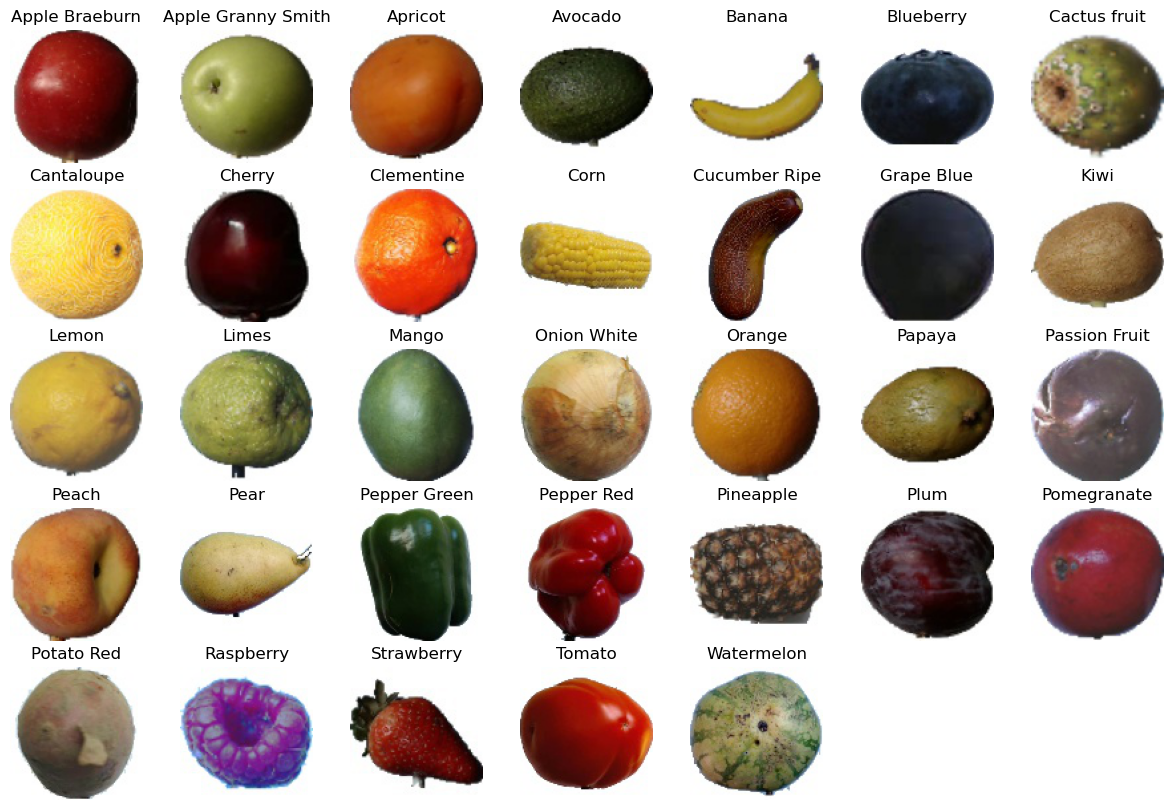

In [14]:
def plot_graph(training_files, class_num):
    image = training_files[class_num][0]+"\\"+training_files[class_num][2][0] #taking first file image and drawing
    img = mpimg.imread(image)
    plt.imshow(img) 
    plt.title(all_classes[class_num])
    plt.axis("off")
    
class_num = 33
plt.figure(figsize = (15,10))
for i in range(class_num):
    plt.subplot(5,7,i+1)
    plot_graph(training_files, i)    

In [15]:
training_dict = {
    'folder_path':[],
    'filename':[],
    'class':[]
}
for i in training_files:
    for j in i[2]:
        training_dict['folder_path'].append(i[0])
        training_dict['filename'].append(j)
        training_dict['class'].append(i[0].split("\\")[-1])
        
fruits_df = pd.DataFrame(training_dict)
fruits_df.head()

,folder_path,filename,class
0,./train/train\Apple Braeburn,Apple Braeburn_0.jpg,Apple Braeburn
1,./train/train\Apple Braeburn,Apple Braeburn_1.jpg,Apple Braeburn
2,./train/train\Apple Braeburn,Apple Braeburn_10.jpg,Apple Braeburn
3,./train/train\Apple Braeburn,Apple Braeburn_100.jpg,Apple Braeburn
4,./train/train\Apple Braeburn,Apple Braeburn_101.jpg,Apple Braeburn


In [16]:
#Read test data and create a dataframe
test_path = './test/test'
test_data = {
       'folder_path' : [],
       'filename': []}
for dirpath, dirnames, filenames in os.walk(test_path):
    for f in filenames:
        test_data['folder_path'].append(dirpath)
        test_data['filename'].append(f)
        
test_data_df = pd.DataFrame(test_data)
test_data_df.head()

,folder_path,filename
0,./test/test,0000.jpg
1,./test/test,0001.jpg
2,./test/test,0002.jpg
3,./test/test,0003.jpg
4,./test/test,0004.jpg


In [17]:
images = []
classes = [] 

for _, d in fruits_df.iterrows():
    img = load_img(os.path.join(d['folder_path'],d['filename']))
    images.append(img_to_array(img))
    classes.append(d['class'])

In [18]:
images = np.array(images)
classes = np.array(classes)
print(f"Complete data images shape: {images.shape} and label shape: {classes.shape}")

Complete data images shape: (16854, 100, 100, 3) and label shape: (16854,)


In [19]:
images[0].shape

(100, 100, 3)

In [20]:
images[0]

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [21]:
classes[0]

'Apple Braeburn'

In [22]:
test_images = []

for _, d in test_data_df.iterrows():
    img = load_img(os.path.join(d['folder_path'],d['filename']))
    test_images.append(img_to_array(img))
    
test_images = np.array(test_images)
print(f"Test images shape: {test_images.shape} ")

Test images shape: (5641, 100, 100, 3) 


In [23]:
classes

array(['Apple Braeburn', 'Apple Braeburn', 'Apple Braeburn', ...,
       'Watermelon', 'Watermelon', 'Watermelon'], dtype='<U18')

In [24]:
class_indices = dict(zip(classes, range(len(classes))))

labels_encoded = list(map(class_indices.get, classes))

#Convert to categorical data using tensorflow 
#labels to One-hot encoded
label_categorical = tf.keras.utils.to_categorical(labels_encoded, num_classes=len(classes), dtype='uint8')

In [30]:
len(label_categorical[0]) # 16854 arrays / array => 16854 values [0,0,...1,..0]

16854

In [29]:
np.argmax(label_categorical[0])

491

In [31]:
train_im, valid_im, train_lab, valid_lab = train_test_split(images, label_categorical, test_size=0.20, 
                                                            stratify=label_categorical, 
                                                            random_state=40, shuffle = True)

In [32]:
print ("train data shape after the split: ", train_im.shape)
print ('new validation data shape: ', valid_im.shape)
print ("validation labels shape: ", valid_lab.shape)

train data shape after the split:  (13483, 100, 100, 3)
new validation data shape:  (3371, 100, 100, 3)
validation labels shape:  (3371, 16854)


In [33]:
print ('train im and label types: ', type(train_im), type(train_lab))

training_data = tf.data.Dataset.from_tensor_slices((train_im, train_lab))
validation_data = tf.data.Dataset.from_tensor_slices((valid_im, valid_lab))
test_data = tf.data.Dataset.from_tensor_slices(test_images)

print ('check types; ', type(training_data), type(validation_data), type(test_data))

train im and label types:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>
check types;  <class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'> <class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'> <class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'>


In [35]:
next(iter(training_data))

(<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
 array([[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],
 
        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],
 
        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],
 
        ...,
 
        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],
 
        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
      

In [36]:
BATCH_SIZE = 128 
AUTOTUNE = tf.data.AUTOTUNE 

rescale_data = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1/255.)
])

data_augmenation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode = "horizontal"),
])

def prepare(ds, shuffle=False, augment = False, test = False):
    if test:
        ds = ds.map(lambda x: (rescale_data(x)), num_parallel_calls=AUTOTUNE)
    else:
        ds = ds.map(lambda x, y: (rescale_data(x), y), num_parallel_calls=AUTOTUNE)
    
    if shuffle:
        ds = ds.shuffle(1000)

    #batch the data 
    ds = ds.batch(BATCH_SIZE)
    
    # Use data augmentation only on the training set.
    if augment:
        ds = ds.map(lambda x, y: (data_augmenation(x, training=True), y), 
                num_parallel_calls=AUTOTUNE)
    
    # Use buffered prefetching on all datasets.
    return ds.prefetch(buffer_size=AUTOTUNE)


In [37]:
train_ds = prepare(training_data, shuffle = True, augment = True)
val_ds = prepare(validation_data)
test_ds = prepare(test_data, test=True)

In [38]:
list(iter(train_ds))[0]

(<tf.Tensor: shape=(128, 100, 100, 3), dtype=float32, numpy=
 array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
     

In [39]:

# The model consists of a convolutional layer, a max pooling layer, a flatten layer, and a dense (fully connected) layer with a softmax activation function
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=5, 
                          kernel_size = 3,
                          activation = "relu",
                          input_shape = (100,100,3)),
    tf.keras.layers.MaxPool2D(pool_size =2,
                             padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(classes), activation="softmax")
])

model_1.compile(loss="categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])
model_1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 5)         140       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 5)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 12005)             0         
                                                                 
 dense (Dense)               (None, 16854)             202349124 
                                                                 
Total params: 202349264 (771.90 MB)
Trainable params: 202349264 (771.90 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
#Fit the model on training data 
history_1 = model_1.fit(train_ds,
                       epochs =2,
                       validation_data= val_ds)

Epoch 1/2


106/106 [==============================] - 1030s 10s/step - loss: 0.9005 - accuracy: 0.7824 - val_loss: 0.1064 - val_accuracy: 0.9858
Epoch 2/2
106/106 [==============================] - 1425s 12s/step - loss: 0.0674 - accuracy: 0.9892 - val_loss: 0.0467 - val_accuracy: 0.9929


In [42]:
model_1.save("model_1.keras")

In [45]:
y_pred = model_1.predict(test_ds)

45/45 [==============================] - 53s 983ms/step


In [60]:
np.argmax(y_pred[2])

8582

In [53]:
test_ds_list = list((iter(test_ds)))

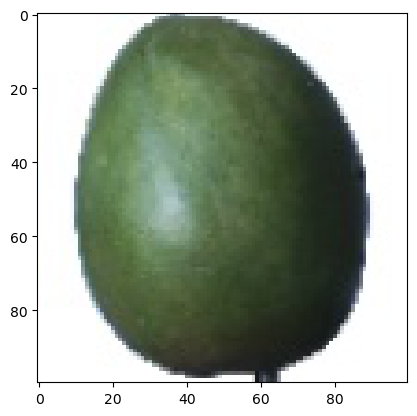

In [59]:
plt.imshow(test_ds_list[0][2])

In [49]:
class_indices

{'Apple Braeburn': 491,
 'Apple Granny Smith': 983,
 'Apricot': 1475,
 'Avocado': 1902,
 'Banana': 2392,
 'Blueberry': 2854,
 'Cactus fruit': 3344,
 'Cantaloupe': 3836,
 'Cherry': 4328,
 'Clementine': 4818,
 'Corn': 5268,
 'Cucumber Ripe': 5660,
 'Grape Blue': 6644,
 'Kiwi': 7110,
 'Lemon': 7602,
 'Limes': 8092,
 'Mango': 8582,
 'Onion White': 9020,
 'Orange': 9499,
 'Papaya': 9991,
 'Passion Fruit': 10481,
 'Peach': 10973,
 'Pear': 11669,
 'Pepper Green': 12113,
 'Pepper Red': 12779,
 'Pineapple': 13269,
 'Plum': 13716,
 'Pomegranate': 14208,
 'Potato Red': 14658,
 'Raspberry': 15148,
 'Strawberry': 15640,
 'Tomato': 16378,
 'Watermelon': 16853}